#####   
<span style="font-family:Arial; font-weight:Bold; font-size:2.5em; color:#00b3e5;"> LSTM - Stock Market Prediction

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values
training_set.shape

(1258, 1)

In [93]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [94]:
x_train, y_train = [], []
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(1198, 60)

In [95]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [98]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [128]:
model = Sequential()

model.add( LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1) ) )
model.add( Dropout(0.2) )

model.add( LSTM(units=50, return_sequences=True ) )
model.add( Dropout(0.2) )
model.add( LSTM(units=50, return_sequences=True ) )
model.add( Dropout(0.2) )
model.add( LSTM(units=50, return_sequences=True ) )
model.add( Dropout(0.2) ) 

model.add( LSTM(units=50 ) )
model.add( Dropout(0.2) )

model.add( Dense(units=1) )
          
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_43 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_24 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_44 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_25 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_45 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_26 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_46 (LSTM)              (None, 60, 50)          

In [129]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
             )

In [174]:
model.fit( x_train, y_train, epochs=10, batch_size=64 )

Epoch 1/10
19/19 [==============================] - 5s 242ms/step - loss: 9.8774e-04
Epoch 2/10
19/19 [==============================] - 5s 250ms/step - loss: 0.0011
Epoch 3/10
19/19 [==============================] - 5s 255ms/step - loss: 0.0011
Epoch 4/10
19/19 [==============================] - 5s 255ms/step - loss: 0.0010
Epoch 5/10
19/19 [==============================] - 5s 257ms/step - loss: 9.6666e-04
Epoch 6/10
19/19 [==============================] - 5s 253ms/step - loss: 0.0011
Epoch 7/10
19/19 [==============================] - 5s 253ms/step - loss: 9.4383e-04
Epoch 8/10
19/19 [==============================] - 5s 255ms/step - loss: 9.8451e-04
Epoch 9/10
19/19 [==============================] - 5s 257ms/step - loss: 0.0010
Epoch 10/10
19/19 [==============================] - 5s 255ms/step - loss: 9.0311e-04


In [175]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

dataset_total = pd.concat( (dataset_train['Open'],dataset_test['Open']), axis=0 )

inputs = dataset_total[ len(dataset_total) - len(dataset_test) - 60: ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []

for i in range(60,80):
    x_test.append( inputs[i-60:i,0] )
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 76ms/step


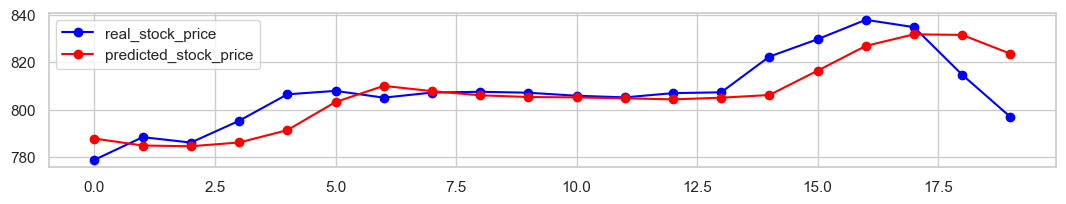

In [176]:
plt.plot(     real_stock_price, color='blue', marker='o', label=     'real_stock_price' )
plt.plot(predicted_stock_price, color='red' , marker='o', label='predicted_stock_price' )
plt.legend()
plt.show()

#####   

#####   

#####   

#####   